In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
from wordcloud import WordCloud,STOPWORDS

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#NLTK libraries
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from imblearn.over_sampling import SMOTE

In [5]:
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

In [7]:
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [8]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [10]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [12]:
#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [14]:
df_1=pd.read_csv(r'F:\Uni of Kent\big data\Big Data Assignment\df_first_set.csv')

In [15]:
df_2=pd.read_csv(r'F:\Uni of Kent\big data\Big Data Assignment\df_second_set.csv')

In [16]:
df_3=pd.read_csv(r'F:\Uni of Kent\big data\Big Data Assignment\df_third_set.csv')

In [66]:
(len(df_1),len(df_2),len(df_3))

(564801, 581916, 564802)

In [18]:
reviews

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
385766,4.0,True,"03 19, 2015",A2C9Z98YHDRT39,B000GASX9O,NaN,Russell k Young Sr.,Worked great,Four Stars,1426723200,NaN,NaN
452513,5.0,True,"02 22, 2015",A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",JoeSharAZ,Awesome for what its meant for. Fits my CBR 60...,Five Stars,1424563200,NaN,NaN
78559,1.0,False,"03 12, 2015",A1PVW9XC4O65NP,B002XG202U,NaN,Meat popsicle,I went to put this one on my back window and m...,Needless to say I'm not happy. Maybe you'll ha...,1426118400,NaN,NaN
311188,5.0,True,"01 25, 2018",A3DYMELC3IHJ32,B0016ZBP1Q,NaN,Dennis McKerley,The kit worked perfect with very little effort.,Five Stars,1516838400,NaN,NaN
138878,5.0,True,"08 30, 2016",A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},Larry Bissell,TY,Five Stars,1472515200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
450891,5.0,True,"05 12, 2017",A14YKBXM26JBQA,B005J3L35O,NaN,Chris Johnson,Just what I needed. The batteries on my motor ...,Thanks great quality and fast shipping/,1494547200,NaN,NaN
402053,1.0,True,"08 28, 2016",AJY5PGEQ3RUO2,B0013HZOO6,NaN,Rosalinda Calumag,way to big for smart car no where to put,One Star,1472342400,NaN,NaN
11055,5.0,True,"01 23, 2018",A2B80IF8TI4I18,B0023UX6T2,{'Style:': ' Wye Fitting'},James Keith,Honestly debated buying anything from CAMCO du...,CAMCO? Do you still not want my business?,1516665600,NaN,NaN
271067,5.0,True,"07 15, 2016",AAD0TGDF02JWD,B000HTROIK,NaN,ED CIRMINIELLO,A+++,Five Stars,1468540800,NaN,NaN


In [19]:
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(reviews.shape))
print ("The Information about the dataset:" + str(reviews.info()))

The shape of the  data is (row, column):(5000, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 385766 to 116375
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         5000 non-null   float64
 1   verified        5000 non-null   bool   
 2   reviewTime      5000 non-null   object 
 3   reviewerID      5000 non-null   object 
 4   asin            5000 non-null   object 
 5   style           1717 non-null   object 
 6   reviewerName    4999 non-null   object 
 7   reviewText      4997 non-null   object 
 8   summary         5000 non-null   object 
 9   unixReviewTime  5000 non-null   int64  
 10  vote            547 non-null    float64
 11  image           158 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 473.6+ KB
The Information about the dataset:None


In [20]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             3283
reviewerName         1
reviewText           3
summary              0
unixReviewTime       0
vote              4453
image             4842
dtype: int64

In [21]:
reviews['reviewText'] = reviews['reviewText'].fillna('Missing')

In [22]:
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             3283
reviewerName         1
reviewText           0
summary              0
unixReviewTime       0
vote              4453
image             4842
dtype: int64

In [23]:
print('The distribution of categories of sentiment:') 
reviews['overall'].value_counts()

The distribution of categories of sentiment:


5.0    3613
4.0     713
3.0     292
1.0     232
2.0     150
Name: overall, dtype: int64

In [24]:
import seaborn as sns

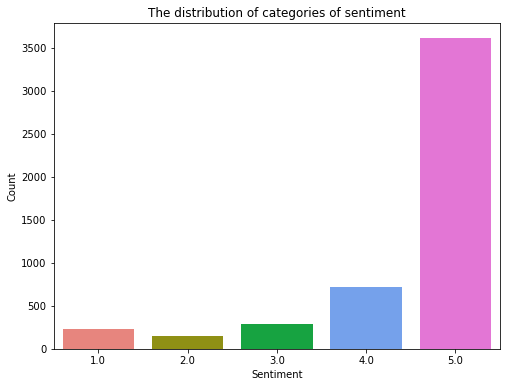

In [25]:
plt.figure(figsize=(8,6)) # Optional: Set the figure size
sns.countplot(x='overall', data=reviews, palette=['#F8766D', '#A3A500', '#00BA38', '#619CFF', '#F564E3'])
plt.title('The distribution of categories of sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plot a graph for the ratings

In [26]:
reviews['reviews'] = reviews['reviewText'] + reviews['summary']
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,unixReviewTime,vote,image,reviews
385766,4.0,True,"03 19, 2015",A2C9Z98YHDRT39,B000GASX9O,NaN,Russell k Young Sr.,1426723200,NaN,NaN,Worked greatFour Stars
452513,5.0,True,"02 22, 2015",A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",JoeSharAZ,1424563200,NaN,NaN,Awesome for what its meant for. Fits my CBR 60...
78559,1.0,False,"03 12, 2015",A1PVW9XC4O65NP,B002XG202U,NaN,Meat popsicle,1426118400,NaN,NaN,I went to put this one on my back window and m...
311188,5.0,True,"01 25, 2018",A3DYMELC3IHJ32,B0016ZBP1Q,NaN,Dennis McKerley,1516838400,NaN,NaN,The kit worked perfect with very little effort...
138878,5.0,True,"08 30, 2016",A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},Larry Bissell,1472515200,NaN,NaN,TYFive Stars


In [27]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [28]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,unixReviewTime,vote,image,reviews,Sentiment
385766,4.0,True,"03 19, 2015",A2C9Z98YHDRT39,B000GASX9O,NaN,Russell k Young Sr.,1426723200,NaN,NaN,Worked greatFour Stars,Positive
452513,5.0,True,"02 22, 2015",A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",JoeSharAZ,1424563200,NaN,NaN,Awesome for what its meant for. Fits my CBR 60...,Positive
78559,1.0,False,"03 12, 2015",A1PVW9XC4O65NP,B002XG202U,NaN,Meat popsicle,1426118400,NaN,NaN,I went to put this one on my back window and m...,Negative
311188,5.0,True,"01 25, 2018",A3DYMELC3IHJ32,B0016ZBP1Q,NaN,Dennis McKerley,1516838400,NaN,NaN,The kit worked perfect with very little effort...,Positive
138878,5.0,True,"08 30, 2016",A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},Larry Bissell,1472515200,NaN,NaN,TYFive Stars,Positive


In [29]:
print('The count of sentiments:')
reviews['Sentiment'].value_counts()

The count of sentiments:


Positive    4326
Negative     382
Neutral      292
Name: Sentiment, dtype: int64

plot a graph

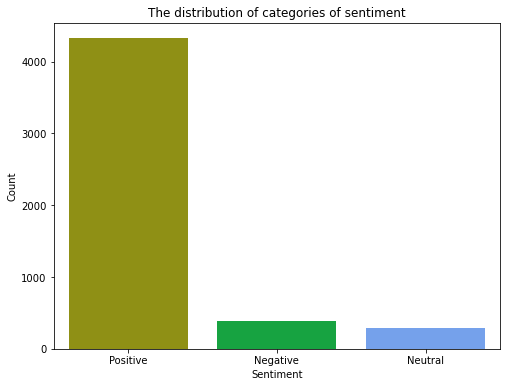

In [30]:
plt.figure(figsize=(8,6)) # Optional: Set the figure size
sns.countplot(x='Sentiment', data=reviews, palette=['#A3A500', '#00BA38', '#619CFF'])
plt.title('The distribution of categories of sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
# Splitting the date 
re_new = reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# adding month to the main dataset 
reviews["date"] = re_new[0] 
  
# adding day to the main dataset 
reviews["year"] = re_new[1] 

re_new1 = reviews["date"].str.split(" ", n = 1, expand = True) 

# adding month to the main dataset 
reviews["month"] = re_new1[0] 

# adding day to the main dataset 
reviews["day"] = re_new1[1]

reviews = reviews.drop(['reviewTime', 'date'], axis=1)
reviews.head() 

,overall,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,image,reviews,Sentiment,year,month,day
385766,4.0,True,A2C9Z98YHDRT39,B000GASX9O,NaN,Russell k Young Sr.,1426723200,NaN,NaN,Worked greatFour Stars,Positive,2015,03,19
452513,5.0,True,A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",JoeSharAZ,1424563200,NaN,NaN,Awesome for what its meant for. Fits my CBR 60...,Positive,2015,02,22
78559,1.0,False,A1PVW9XC4O65NP,B002XG202U,NaN,Meat popsicle,1426118400,NaN,NaN,I went to put this one on my back window and m...,Negative,2015,03,12
311188,5.0,True,A3DYMELC3IHJ32,B0016ZBP1Q,NaN,Dennis McKerley,1516838400,NaN,NaN,The kit worked perfect with very little effort...,Positive,2018,01,25
138878,5.0,True,A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},Larry Bissell,1472515200,NaN,NaN,TYFive Stars,Positive,2016,08,30


In [32]:
print('The year - wise count of reviews:')
reviews['year'].value_counts()

The year - wise count of reviews:


 2016    1351
 2015    1034
 2017    1027
 2014     651
 2018     463
 2013     293
 2012     107
 2011      46
 2010      19
 2008       5
 2009       2
 2006       1
 2007       1
Name: year, dtype: int64

In [33]:
print('Year - wise count of sentiments:')
reviews.groupby(['year','Sentiment']).size()

Year - wise count of sentiments:


year   Sentiment
 2006  Positive        1
 2007  Positive        1
 2008  Positive        5
 2009  Positive        2
 2010  Negative        2
       Neutral         3
       Positive       14
 2011  Negative        5
       Neutral         7
       Positive       34
 2012  Negative       12
       Neutral         7
       Positive       88
 2013  Negative       27
       Neutral        18
       Positive      248
 2014  Negative       36
       Neutral        36
       Positive      579
 2015  Negative       73
       Neutral        68
       Positive      893
 2016  Negative       93
       Neutral        68
       Positive     1190
 2017  Negative       92
       Neutral        55
       Positive      880
 2018  Negative       42
       Neutral        30
       Positive      391
dtype: int64

In [34]:
reviews = reviews.drop(['reviewerName','unixReviewTime'], axis=1)

In [35]:
def clean_review(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['reviews'] = reviews['reviews'].apply(lambda x: clean_review(x))
reviews.head()

,overall,verified,reviewerID,asin,style,vote,image,reviews,Sentiment,year,month,day
385766,4.0,True,A2C9Z98YHDRT39,B000GASX9O,NaN,NaN,NaN,worked greatfour stars,Positive,2015,03,19
452513,5.0,True,A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",NaN,NaN,awesome for what its meant for fits my cbr rr...,Positive,2015,02,22
78559,1.0,False,A1PVW9XC4O65NP,B002XG202U,NaN,NaN,NaN,i went to put this one on my back window and m...,Negative,2015,03,12
311188,5.0,True,A3DYMELC3IHJ32,B0016ZBP1Q,NaN,NaN,NaN,the kit worked perfect with very little effort...,Positive,2018,01,25
138878,5.0,True,A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},NaN,NaN,tyfive stars,Positive,2016,08,30


In [36]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [37]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

,overall,verified,reviewerID,asin,style,vote,image,reviews,Sentiment,year,month,day
385766,4.0,True,A2C9Z98YHDRT39,B000GASX9O,NaN,NaN,NaN,worked greatfour stars,Positive,2015,03,19
452513,5.0,True,A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",NaN,NaN,awesome meant fits cbr rr perfectly doesnt blo...,Positive,2015,02,22
78559,1.0,False,A1PVW9XC4O65NP,B002XG202U,NaN,NaN,NaN,went put one back window half adhesive complet...,Negative,2015,03,12
311188,5.0,True,A3DYMELC3IHJ32,B0016ZBP1Q,NaN,NaN,NaN,kit worked perfect little effortfive stars,Positive,2018,01,25
138878,5.0,True,A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},NaN,NaN,tyfive stars,Positive,2016,08,30


In [38]:
reviews['helpful_review'] = reviews['verified'].apply(lambda x: 1 if x == True else 0)


In [39]:
pd.DataFrame(reviews.groupby('Sentiment')['helpful_review'].mean())


,helpful_review
Sentiment,
Negative,0.916230
Neutral,0.948630
Positive,0.955155


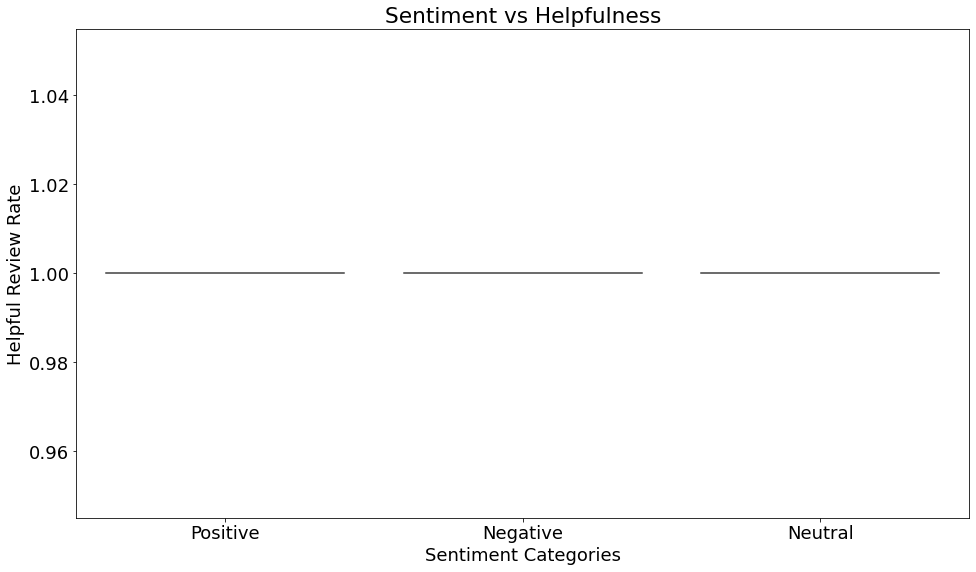

In [40]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
sentiment_helpful_rate = pd.DataFrame(reviews, columns = ['Sentiment', 'helpful_review'])
sentiment_helpful_rate = sentiment_helpful_rate[sentiment_helpful_rate['helpful_review'] != 0.00] 

#Plotting phase
sns.violinplot( x = sentiment_helpful_rate["Sentiment"], y=sentiment_helpful_rate["helpful_review"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment Categories')
plt.ylabel('Helpful Review Rate')
plt.show()

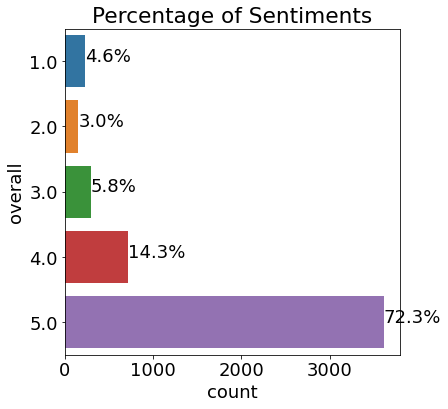

In [41]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Sentiments')
ax = sns.countplot(y = 'overall', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

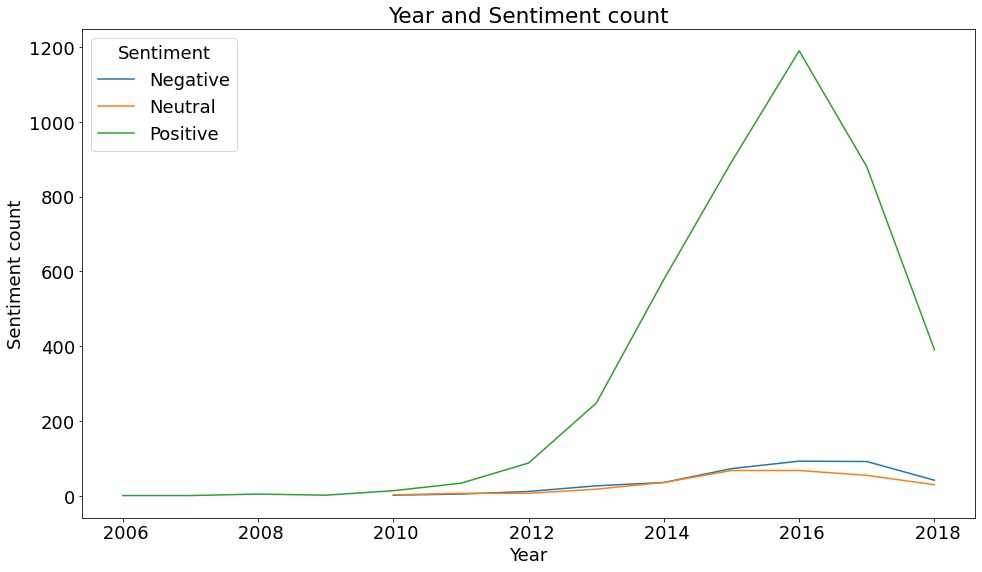

In [42]:
reviews.groupby(['year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

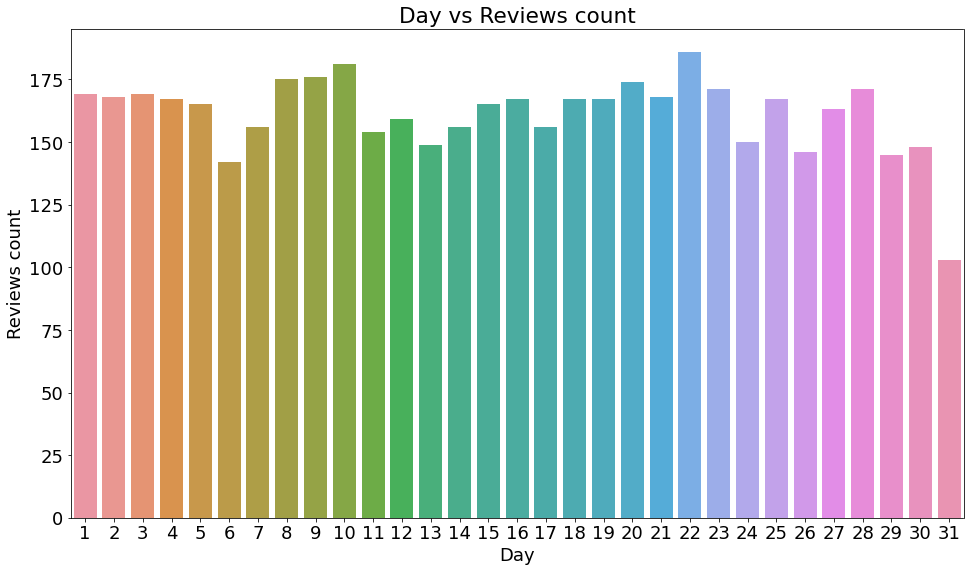

In [43]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('day')['reviews'].count()).reset_index()
dayreview['day'] = dayreview['day'].astype('int64')
dayreview.sort_values(by = ['day'])

#Plotting the graph
sns.barplot(x = "day", y = "reviews", data = dayreview)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [44]:
reviews['polarity'] = reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['reviews'].astype(str).apply(len)
reviews['word_count'] = reviews['reviews'].apply(lambda x: len(str(x).split()))
reviews.head()

,overall,verified,reviewerID,asin,style,vote,image,reviews,Sentiment,year,month,day,helpful_review,polarity,review_len,word_count
385766,4.0,True,A2C9Z98YHDRT39,B000GASX9O,NaN,NaN,NaN,worked greatfour stars,Positive,2015,03,19,1,0.000000,22,3
452513,5.0,True,A33CSV27RZBA9Z,B000GTV7JI,"{'Size:': ' Medium', 'Color:': ' Silver'}",NaN,NaN,awesome meant fits cbr rr perfectly doesnt blo...,Positive,2015,02,22,1,1.000000,61,10
78559,1.0,False,A1PVW9XC4O65NP,B002XG202U,NaN,NaN,NaN,went put one back window half adhesive complet...,Negative,2015,03,12,0,-0.254167,196,33
311188,5.0,True,A3DYMELC3IHJ32,B0016ZBP1Q,NaN,NaN,NaN,kit worked perfect little effortfive stars,Positive,2018,01,25,1,0.406250,42,6
138878,5.0,True,A3OOTM9N2V1FV7,B001550DVU,{'Style:': ' Inverter Cable Kit'},NaN,NaN,tyfive stars,Positive,2016,08,30,1,0.000000,12,2


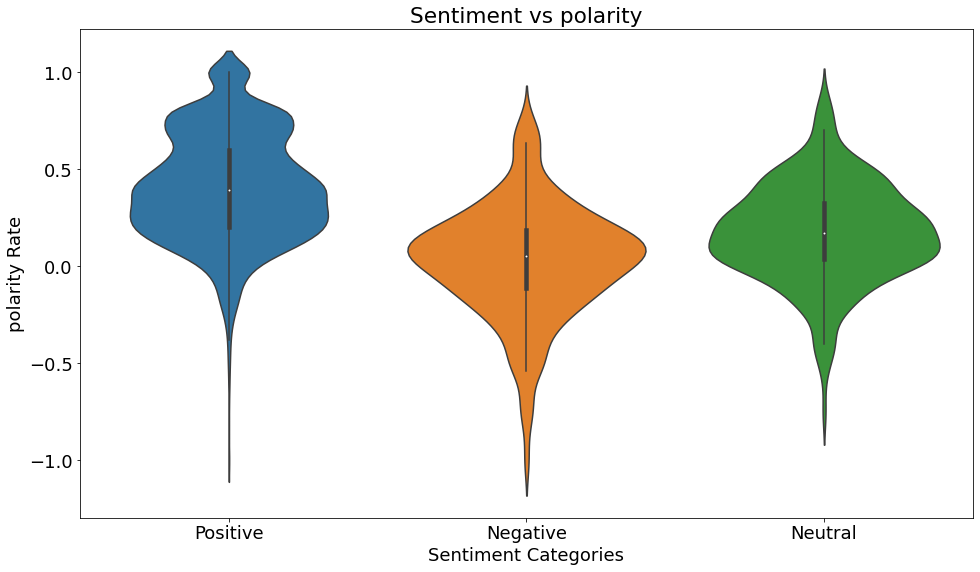

In [45]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
sentiment_helpful_rate = pd.DataFrame(reviews, columns = ['Sentiment', 'polarity'])
sentiment_helpful_rate = sentiment_helpful_rate[sentiment_helpful_rate['polarity'] != 0.00] 

#Plotting phase
sns.violinplot( x = sentiment_helpful_rate["Sentiment"], y=sentiment_helpful_rate["polarity"])
plt.title('Sentiment vs polarity')
plt.xlabel('Sentiment Categories')
plt.ylabel('polarity Rate')
plt.show()

In [46]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [47]:
reviews['polarity'].iplot(
    kind = 'hist',
    bins = 50,
    xTitle = 'Polarity',
    linecolor = 'black',
    yTitle = 'Count',
    title = 'Sentiment Polarity Distribution')

In [48]:
reviews['review_len'].iplot(
    kind ='hist',
    bins = 150,
    xTitle ='Polarity',
    linecolor = 'black',
    yTitle = 'Count',
    title = 'Review Length Distribution')

In [49]:
reviews['word_count'].iplot(
    kind ='hist',
    bins = 150,
    xTitle ='polarity',
    linecolor = 'black',
    yTitle = 'count',
    title = 'Review Word Count Distribution')

In [50]:
#Filtering data
positive_review = reviews[reviews["Sentiment"]=='Positive'].dropna()
neutral_review = reviews[reviews["Sentiment"]=='Neutral'].dropna()
negative_review = reviews[reviews["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [51]:
negative_review

,overall,verified,reviewerID,asin,style,vote,image,reviews,Sentiment,year,month,day,helpful_review,polarity,review_len,word_count
291012,1.0,False,A1RIU1AAU4ZPEC,B000L9QRE8,{'Size:': ' 1-Pack'},177.0,['https://images-na.ssl-images-amazon.com/imag...,video surveillance took thief seconds angle gr...,Negative,2015,05,31,0,0.032523,948,151
151539,1.0,True,A1V2U1JWVWLEKB,B00GRRFLOK,{'Style:': ' Standard'},19.0,['https://images-na.ssl-images-amazon.com/imag...,victory vision big touring bike front loop wid...,Negative,2016,06,26,1,0.100000,306,50
374879,1.0,True,AV63XLSOW5VEZ,B0154FU4H4,{'Color:': ' White(20-Pack)'},27.0,['https://images-na.ssl-images-amazon.com/imag...,bulbs blue tinted looking pure white light rep...,Negative,2016,07,13,1,0.141667,188,31
86494,2.0,True,A2URDJKAV6TJC7,B014V9GFJU,{'Size:': ' 18 Ounces'},19.0,['https://images-na.ssl-images-amazon.com/imag...,cleaned wheel but also discolored gloss black ...,Negative,2017,12,17,1,-0.098333,257,40
390573,2.0,True,A21VKAGD1BSQZ5,B00SRF68QU,{'Size:': ' Driver Side'},8.0,['https://images-na.ssl-images-amazon.com/imag...,no doubt took minutes install but workmanship ...,Negative,2016,06,27,1,-0.021032,360,56
405121,2.0,True,A1DGZNIIPYQ9FG,B000BUQOCM,{'Style:': ' With Hose'},8.0,['https://images-na.ssl-images-amazon.com/imag...,looking flimsy everything made decided not mou...,Negative,2016,09,5,1,0.050000,457,71


In [52]:
# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

In [53]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [ ]:
## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [54]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

NameError: name 'trace1' is not defined

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [55]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

NameError: name 'trace1' is not defined

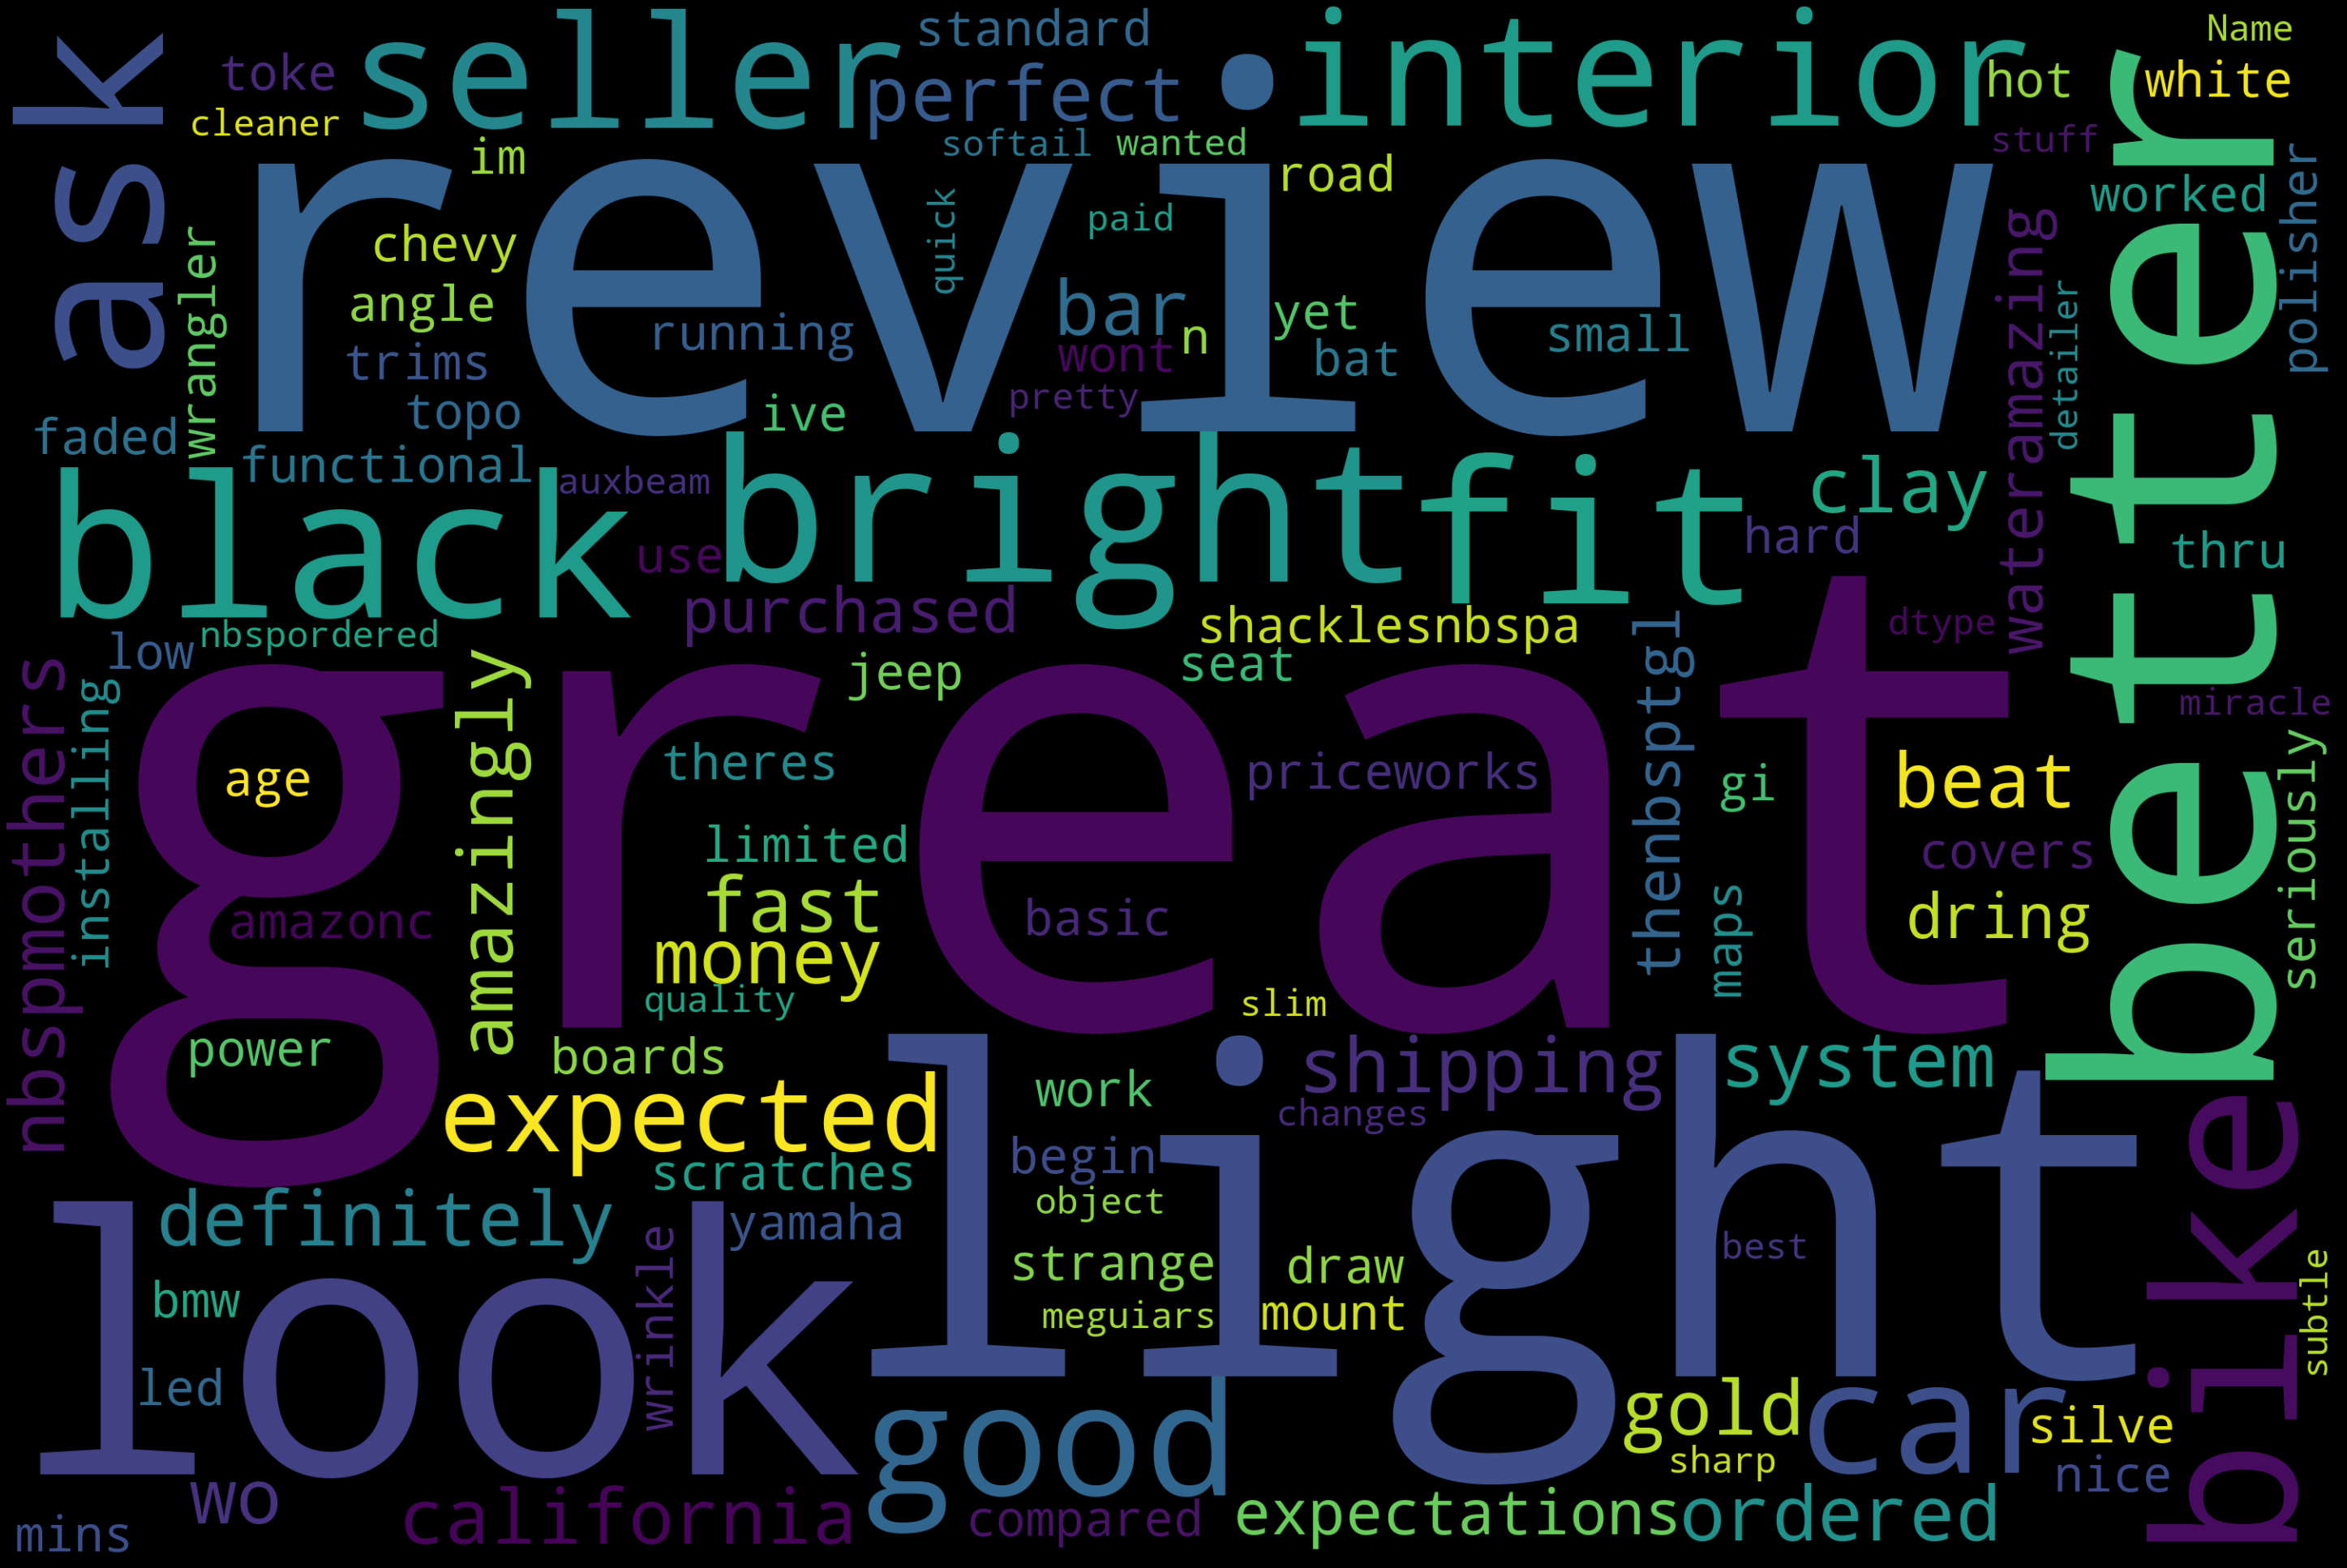

In [56]:
text = positive_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

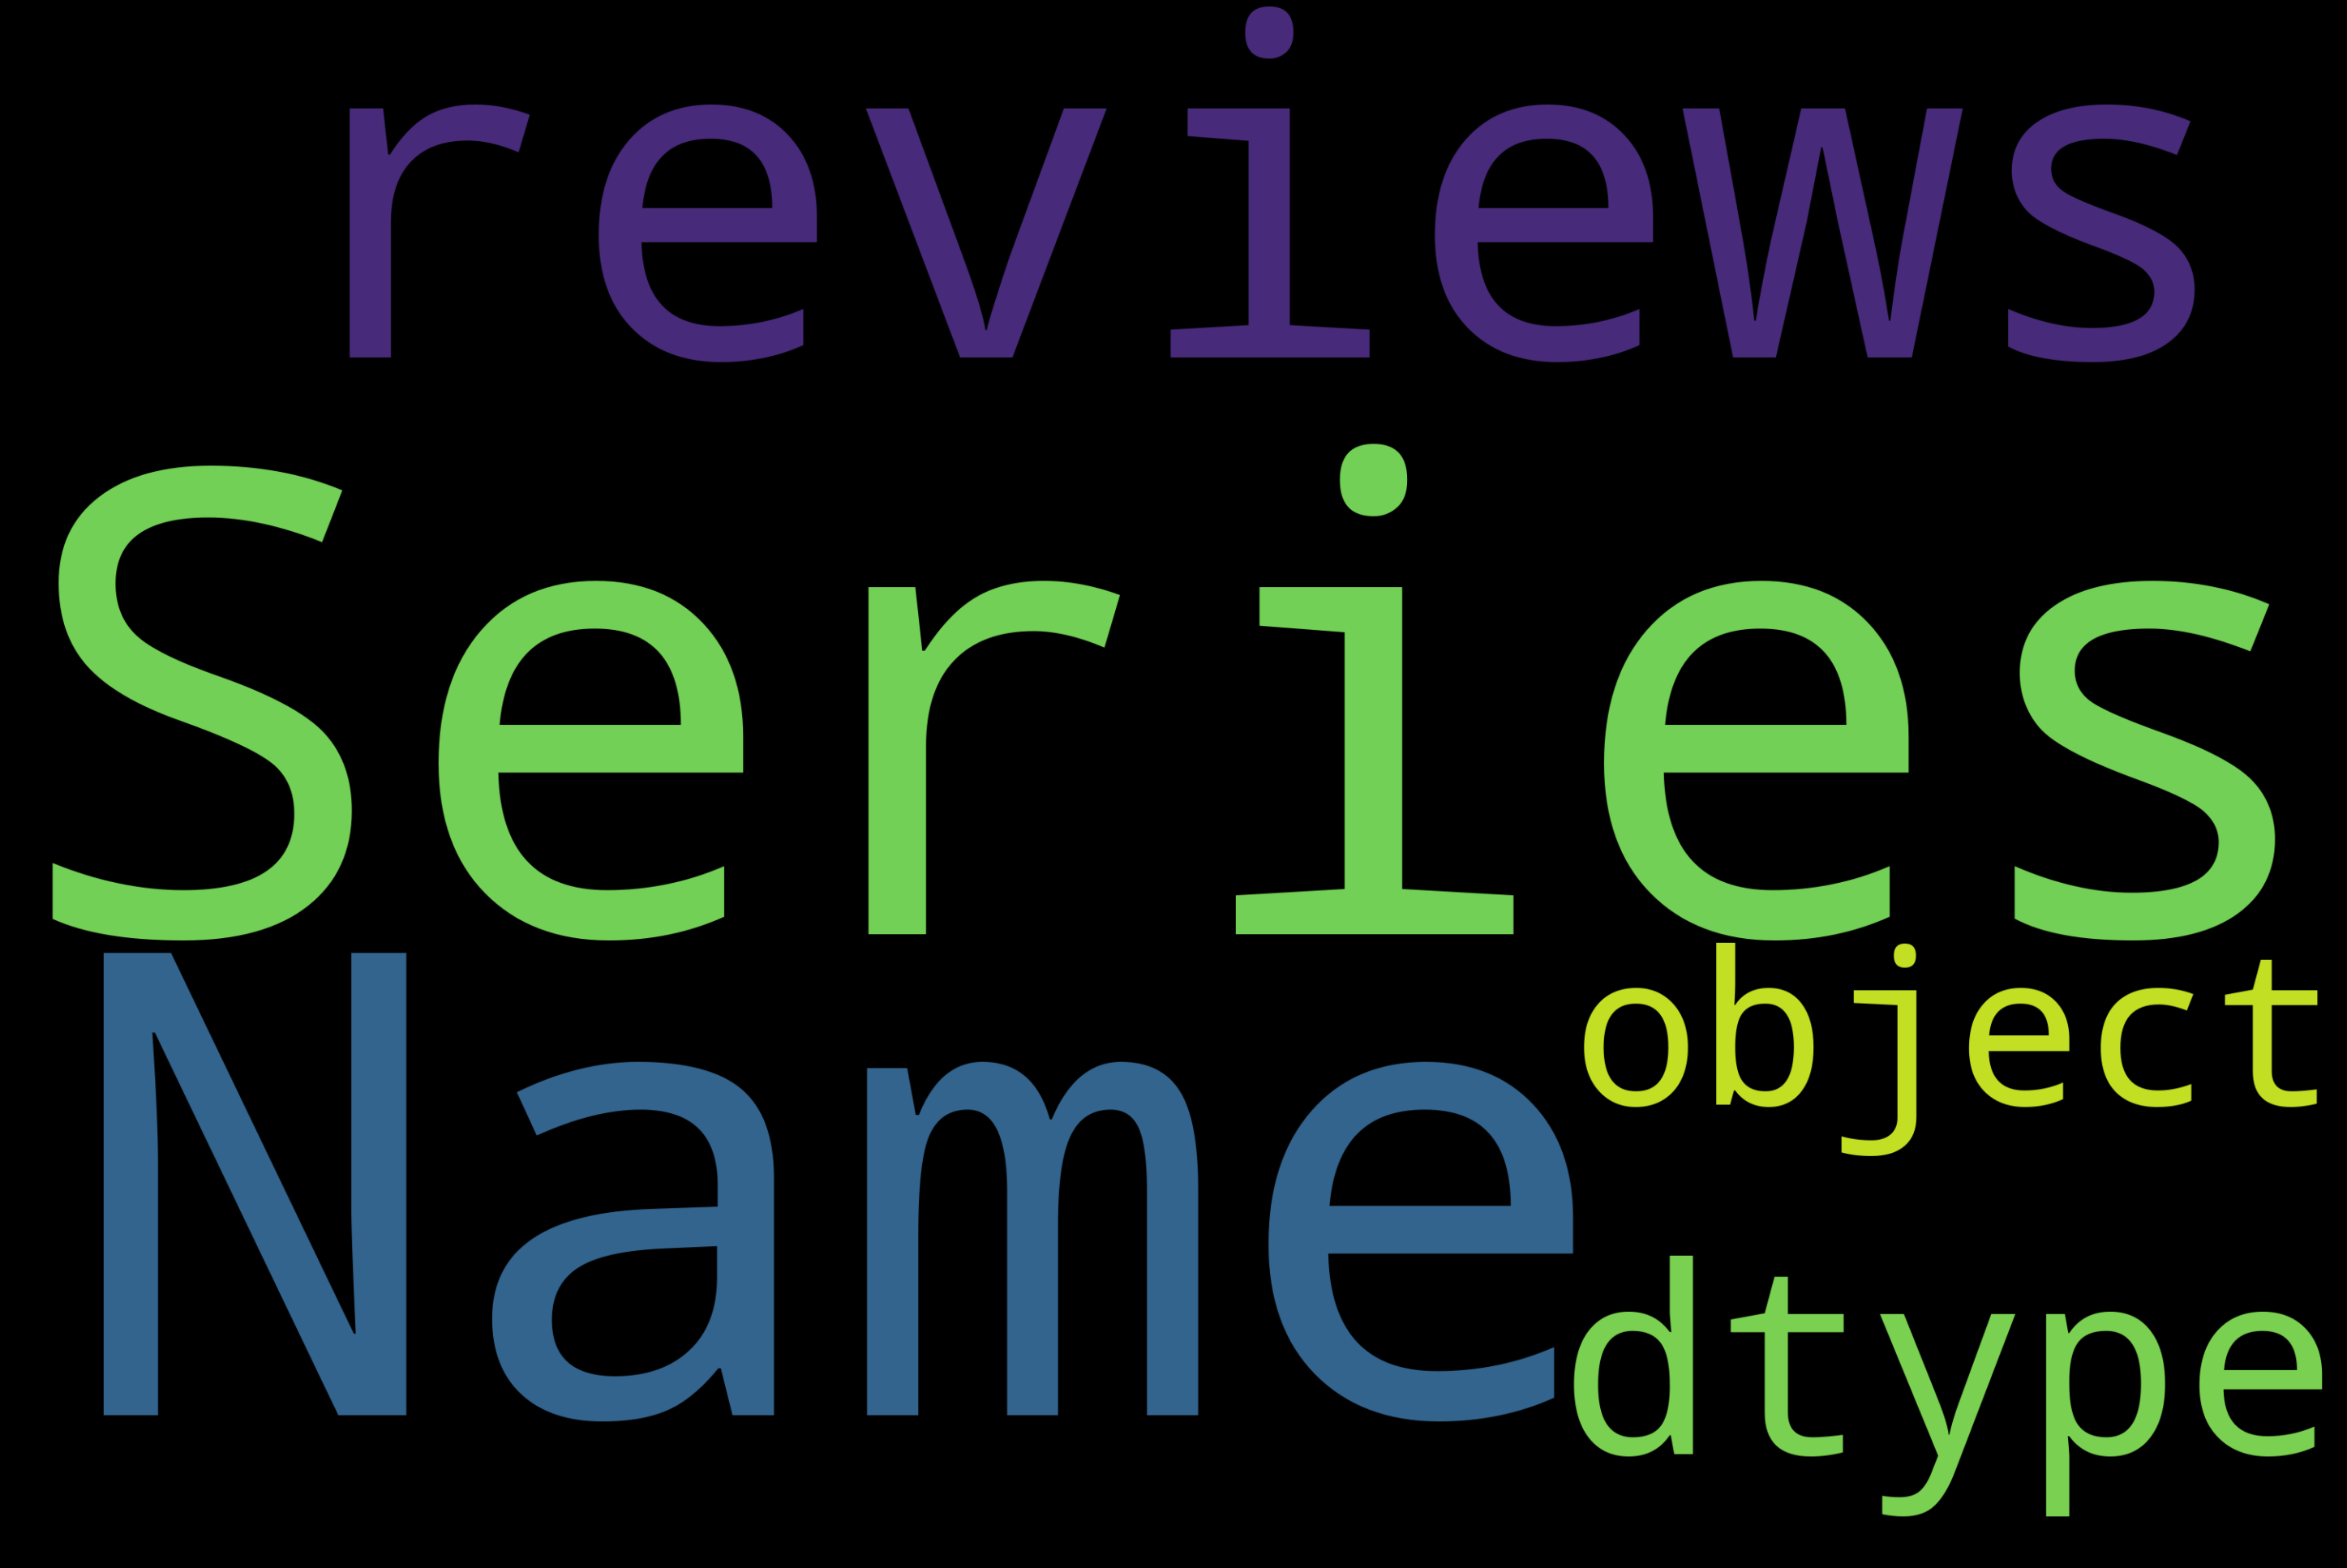

In [57]:
text = neutral_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

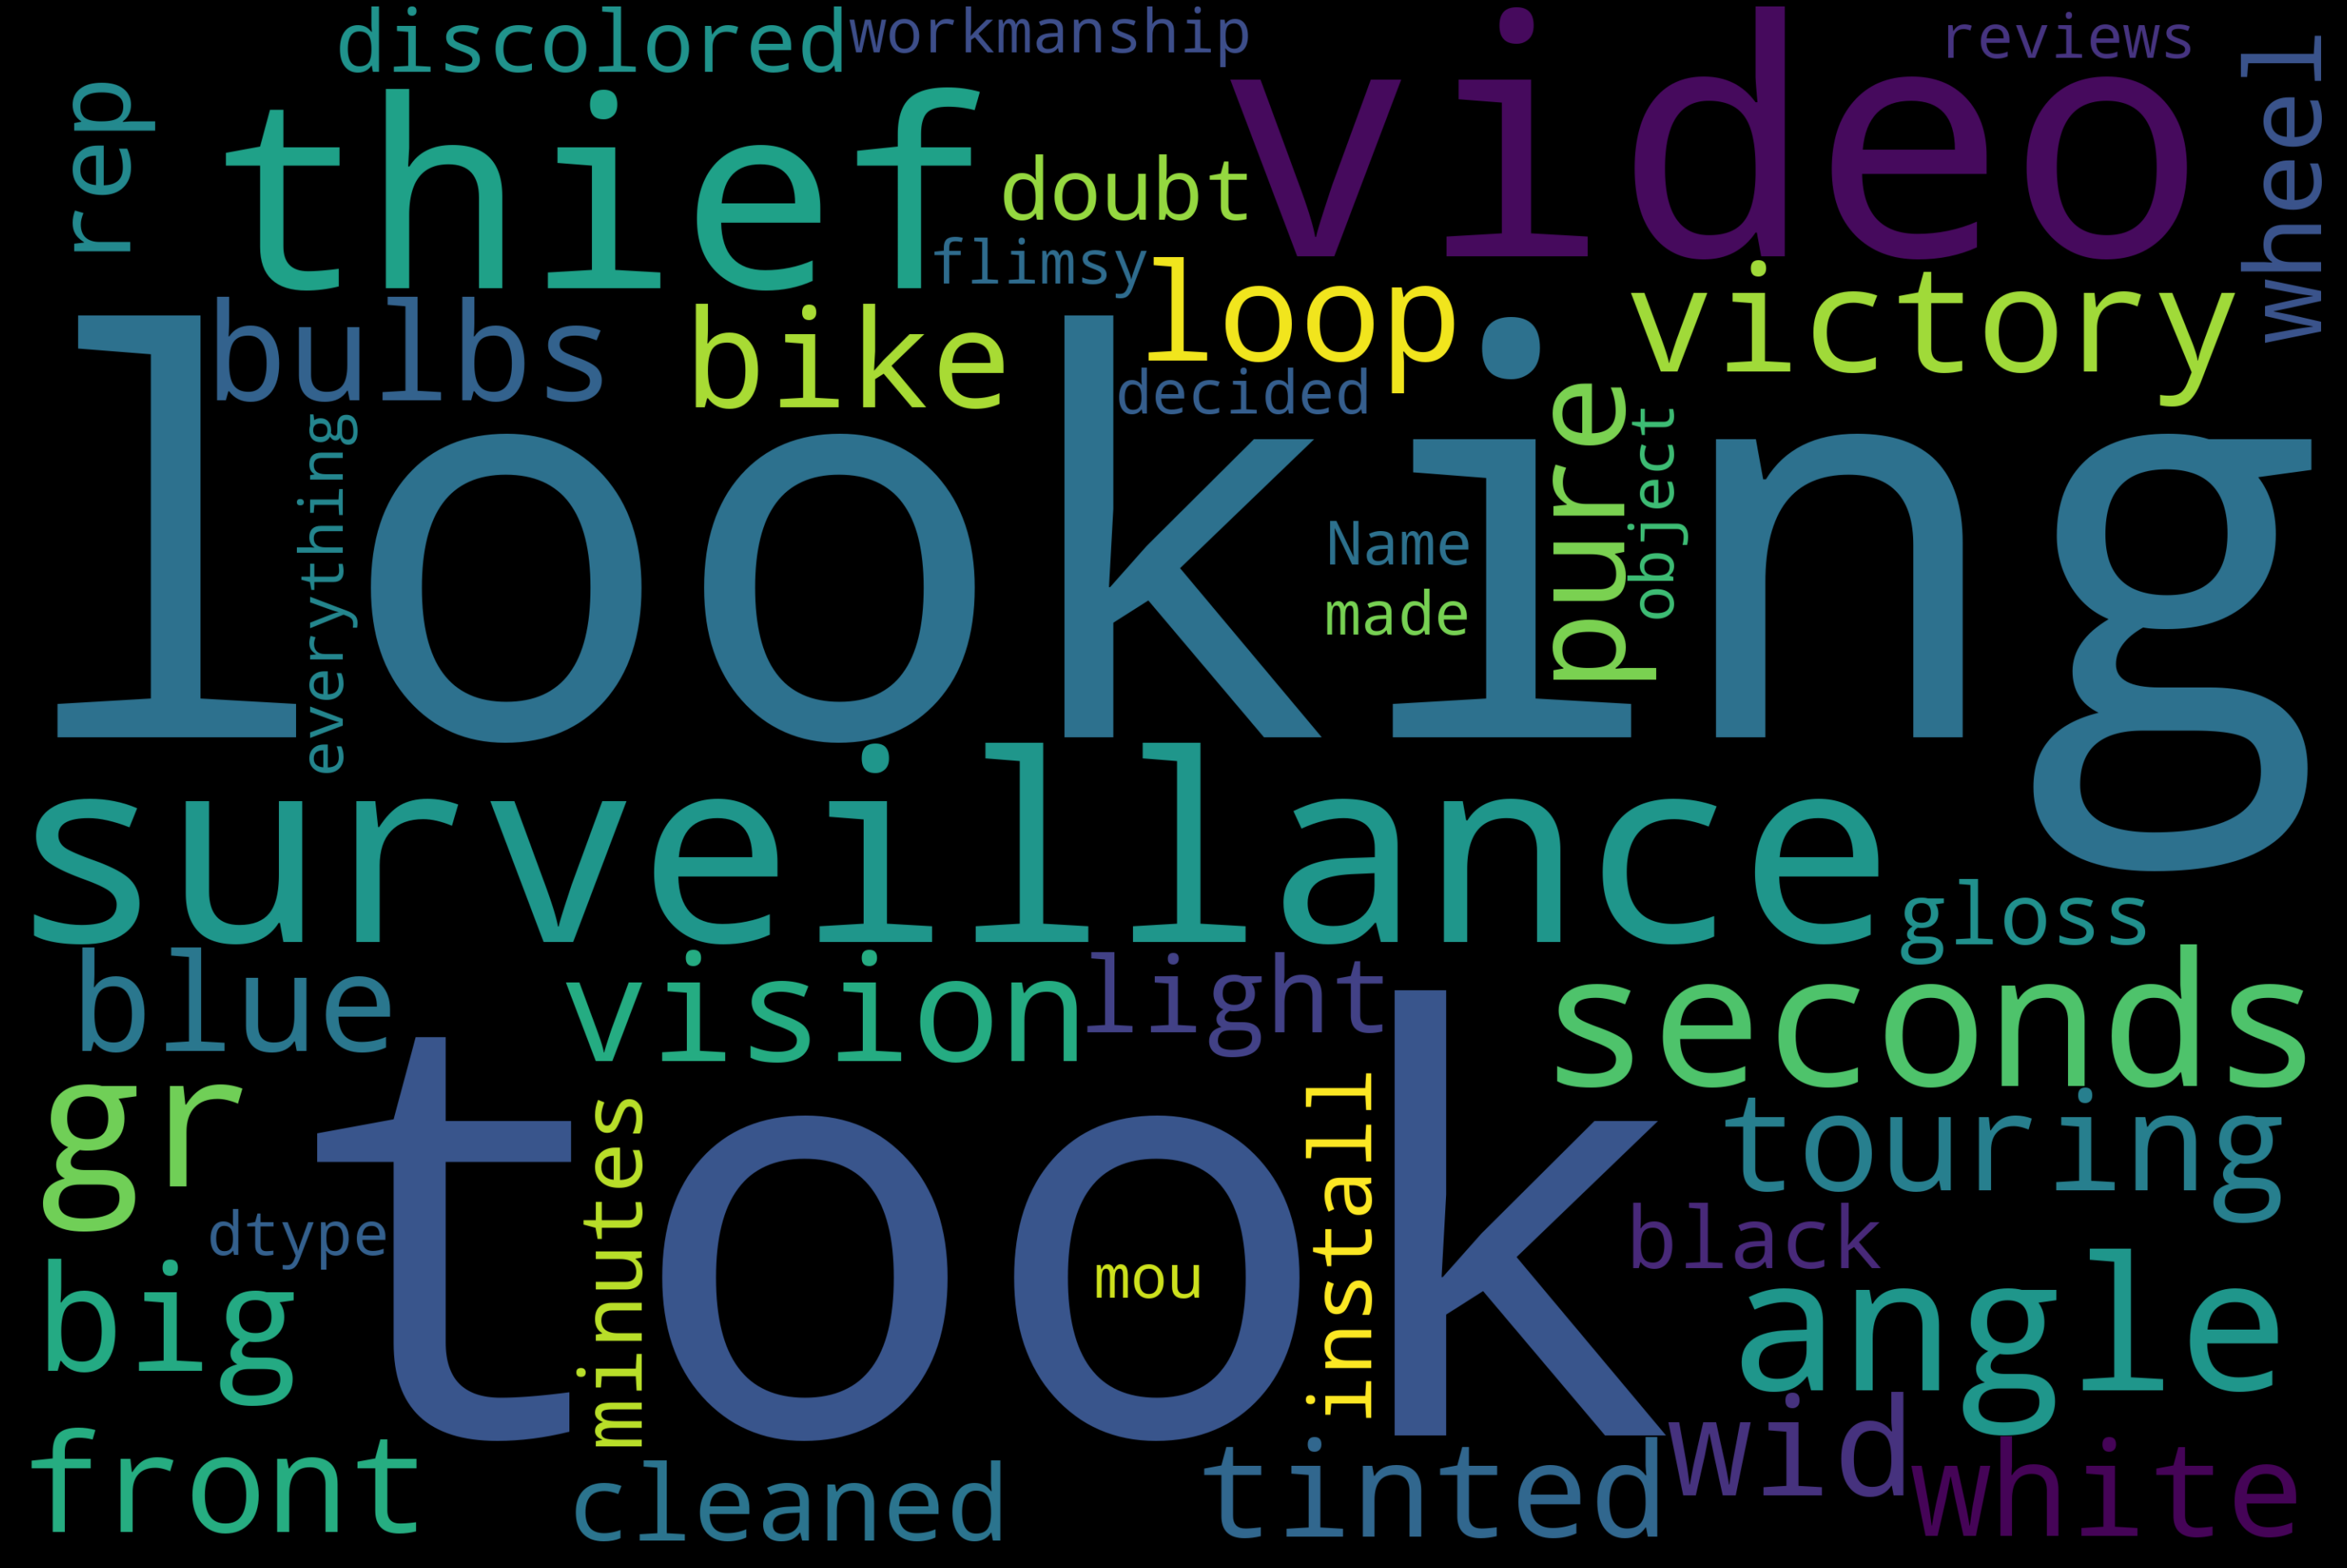

In [58]:
text = negative_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot:xlabel='polarity', ylabel='Density'>

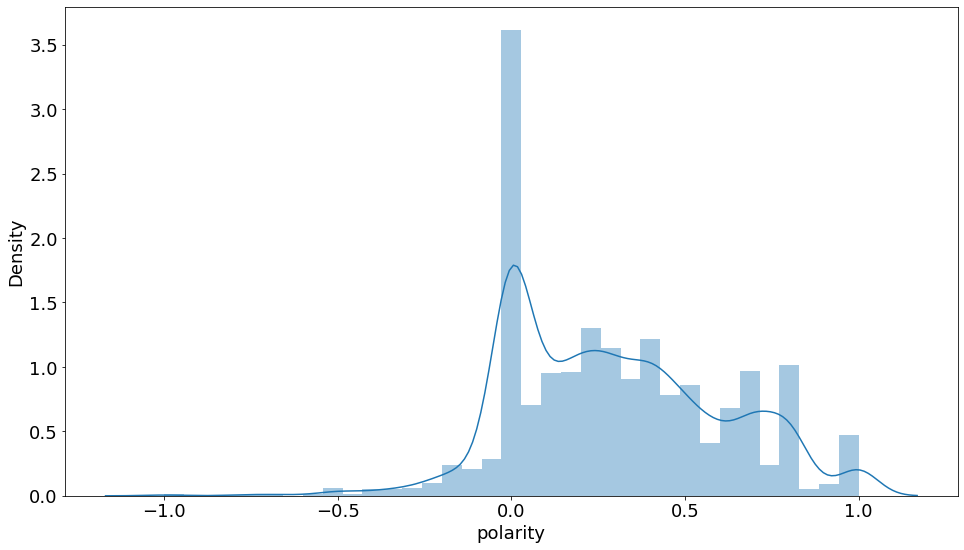

In [59]:
sns.distplot(reviews['polarity'])

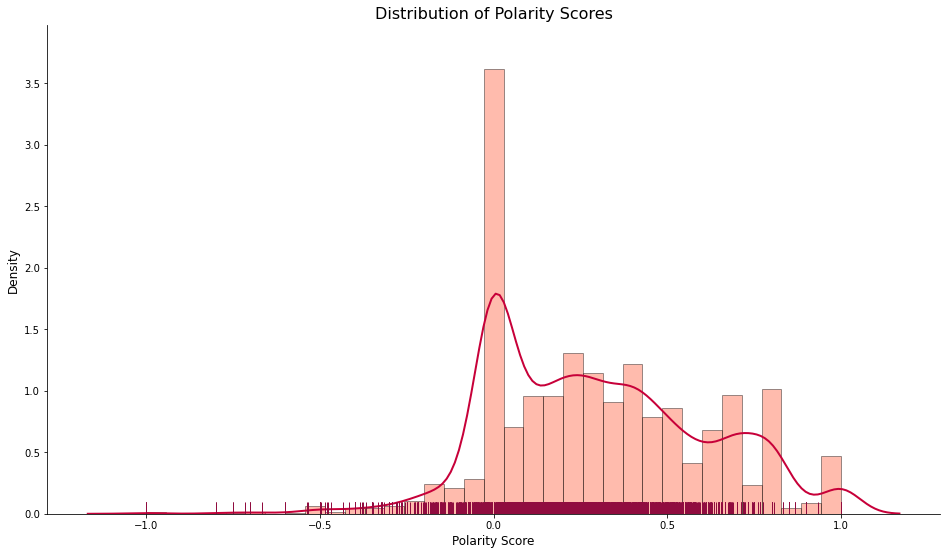

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#FF5733", "#C70039", "#900C3F", "#581845"]

# Create the distplot
sns.distplot(reviews['polarity'], color=colors[0], hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'color': colors[1]}, 
             rug_kws={'color': colors[2]}, 
             hist=True, kde=True, rug=True)

# Customize the plot
plt.title("Distribution of Polarity Scores", fontsize=16)
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

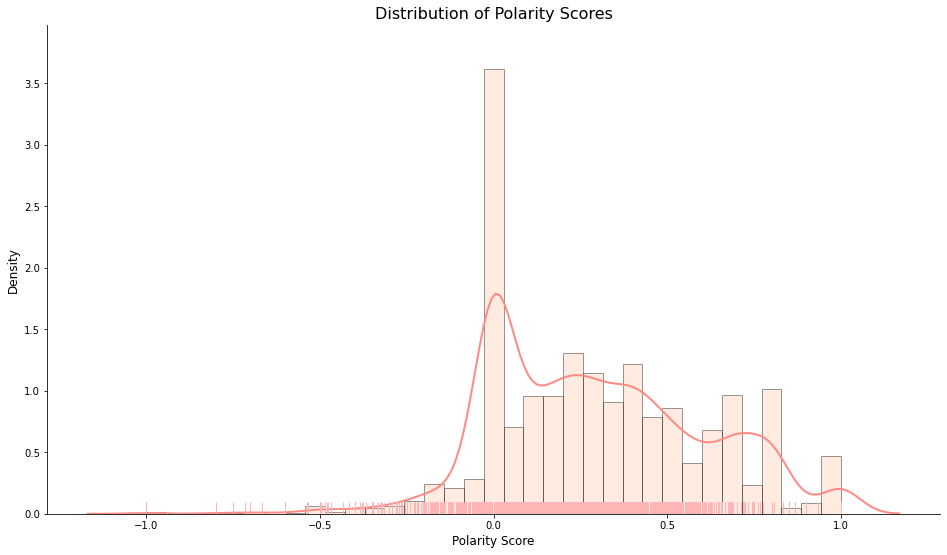

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with a sunrise orange pattern
colors = sns.color_palette(["#FFCDB2", "#FF8A83", "#FFB5B5", "#FFEEE6"])

# Create the distplot
sns.distplot(reviews['polarity'], color=colors[0], hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'color': colors[1]}, 
             rug_kws={'color': colors[2]}, 
             hist=True, kde=True, rug=True)

# Customize the plot
plt.title("Distribution of Polarity Scores", fontsize=16)
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

In [63]:
# calling the label encoder function
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
reviews['Sentiment']= le.fit_transform(reviews['Sentiment']) 

reviews['Sentiment'].unique() 

array([2, 0, 1], dtype=int64)

In [64]:
reviews['Sentiment'].value_counts()

2    4326
0     382
1     292
Name: Sentiment, dtype: int64

In [65]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,worked greatfour stars
1,awesome meant fits cbr rr perfectly doesnt blo...
2,went put one back window half adhesive complet...
3,kit worked perfect little effortfive stars
4,tyfive stars


In [66]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['reviews'])
X.shape

(5000, 5000)

In [67]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(5000,)

In our dataset, there are a lot of positive sentiments compared to negative and neutral, which makes our dataset imbalanced. In order to work for imbalance dataset, SMOTE technique is used to balance out the imbalanced dataset problem. It's aims is to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [68]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_resampled)}')

Original dataset shape : Counter({2: 4326, 0: 382, 1: 292})
Resampled dataset shape Counter({2: 4326, 0: 4326, 1: 4326})


In [69]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
#creating the objects
logreg = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'KNN', 3:'SVC', 4:'Naive Bayes', 5: 'Random Forest'}
cv_models = [logreg, dt, knn, svc, nb, rf]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv = 2, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.8692
Decision Tree Test Accuracy: 0.8518
KNN Test Accuracy: 0.855
SVC Test Accuracy: 0.8694
Naive Bayes Test Accuracy: 0.8493999999999999
Random Forest Test Accuracy: 0.8735999999999999


In [77]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 2, verbose = 0,n_jobs = -1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [78]:
print(y_train.shape)

(4000, 3)


In [79]:
y_train = np.argmax(y_train, axis=1)

In [73]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

NameError: name 'y_pred' is not defined

In [74]:
print("Classification Report:\n",classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

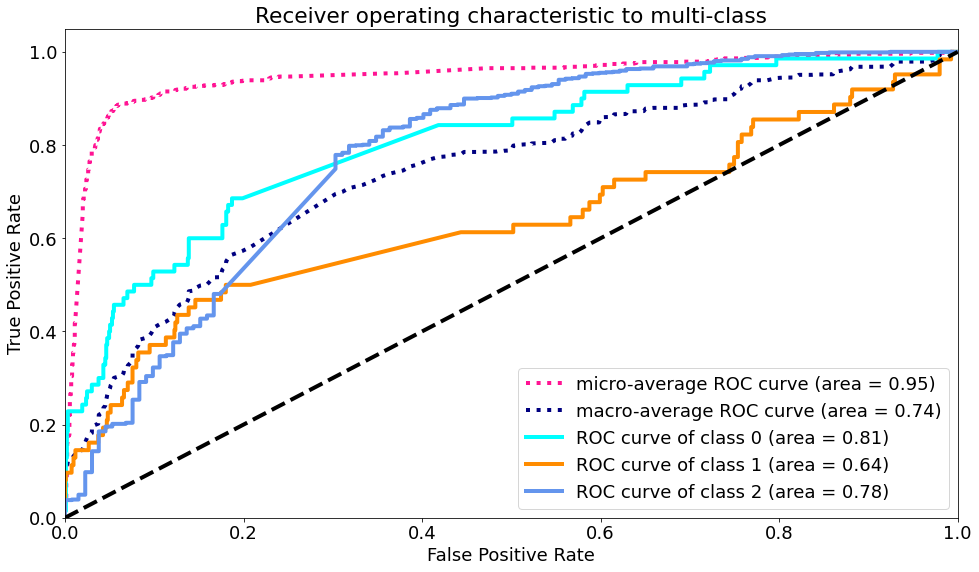

In [75]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel ='linear', probability = True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc = "lower right")
plt.show()  